In [1]:
import pandas as pd
import numpy as np
import itertools


N = 500
T = 500

u_i0 = np.random.normal(size=N)
z_i0 = np.random.binomial(1, p=1/(1 + np.exp(-u_i0)))
x_i0 = np.random.binomial(1, p=1/(1 + np.exp(-z_i0)))

u = [u_i0]
z = [z_i0]
x = [x_i0]
y = [[None]*N]

for t in np.arange(1, T):
    u.append(np.random.normal(size=N))
    z.append(np.random.binomial(1, p=1/(1 + np.exp(-u[t] + 2.*x[t-1]))))
    x.append(np.random.binomial(1, p=1/(1 + np.exp(-z[t]))))
    y.append(np.random.normal(2.*u[t] + x[t]))
    
x = np.array(x)
z = np.array(z)
u = np.array(u)
y = np.array(y)

df = pd.DataFrame([{"i": i, "t": t} for i, t in itertools.product(range(N), range(T))])
df['$X_{it}$'] = df[['i', 't']].apply(lambda row: x[row['t']][row['i']], axis=1)
df['$Z_{it}$'] = df[['i', 't']].apply(lambda row: z[row['t']][row['i']], axis=1)
df['$Y_{it}$'] = df[['i', 't']].apply(lambda row: y[row['t']][row['i']], axis=1)

df = df.dropna()

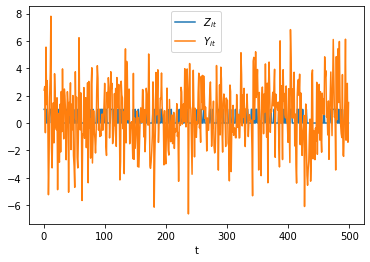

In [2]:
df[df.i==100].plot(x='t', y=['$Z_{it}$', '$Y_{it}$'])

In [3]:
df.corr()

,i,t,$X_{it}$,$Z_{it}$,$Y_{it}$
i,1.000000,0.000000,0.000506,0.000862,0.000366
t,0.000000,1.000000,-0.002292,0.004943,0.000144
$X_{it}$,0.000506,-0.002292,1.000000,0.214167,0.276357
$Z_{it}$,0.000862,0.004943,0.214167,1.000000,0.337029
$Y_{it}$,0.000366,0.000144,0.276357,0.337029,1.000000


In [4]:
from statsmodels.api import OLS


df['intercept'] = 1.

model = OLS(endog=df['$Y_{it}$'], exog=df[['$X_{it}$', 'intercept']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               $Y_{it}$   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                 2.063e+04
Date:                Wed, 22 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:13:55   Log-Likelihood:            -5.5386e+05
No. Observations:              249500   AIC:                         1.108e+06
Df Residuals:                  249498   BIC:                         1.108e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
$X_{it}$       1.2939      0.009    143.634      0.000       1.276       1.312
intercept     -0.1679      0.007    -24.675      0.000      -0.181      -0.155
==============================================================================
Omnibus:                        2.401   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.301   Jarque-Bera (JB):                2.395
Skew:                          -0.006   Prob(JB):                        0.302
Kurtosis:                       3.009   Cond. No.                         2.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
from statsmodels.api import OLS


df['intercept'] = 1.

model = OLS(endog=df['$Y_{it}$'], exog=df[['$X_{it}$', '$Z_{it}$', 'intercept']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               $Y_{it}$   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                 2.351e+04
Date:                Wed, 22 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:30:29   Log-Likelihood:            -5.4256e+05
No. Observations:              249500   AIC:                         1.085e+06
Df Residuals:                  249497   BIC:                         1.085e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
$X_{it}$       1.0100      0.009    114.453      0.000       0.993       1.027
$Z_{it}$       1.4685      0.009    154.760      0.000       1.450       1.487
intercept     -0.4509      0.007    -66.800      0.000      -0.464      -0.438
==============================================================================
Omnibus:                        8.986   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.979
Skew:                          -0.014   Prob(JB):                       0.0112
Kurtosis:                       3.007   Cond. No.                         2.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
df = df.groupby('i').apply(lambda x: x.sort_values('t')).reset_index(drop=True)
df['$X_{i t-1}$'] = df.groupby('i').apply(lambda x: x.sort_values('t').shift(1)).reset_index(drop=True)['$X_{it}$']

df = df.groupby('i').apply(lambda x: x.sort_values('t')).reset_index(drop=True)
df['$Z_{i t-1}$'] = df.groupby('i').apply(lambda x: x.sort_values('t').shift(1)).reset_index(drop=True)['$Z_{it}$']

df = df.dropna()

In [6]:
from statsmodels.api import OLS


df['intercept'] = 1.

model = OLS(endog=df['$Y_{it}$'], exog=df[['$X_{it}$', '$X_{i t-1}$', '$Z_{it}$', 'intercept']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               $Y_{it}$   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                 1.719e+04
Date:                Wed, 22 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:16:40   Log-Likelihood:            -5.3922e+05
No. Observations:              249000   AIC:                         1.078e+06
Df Residuals:                  248996   BIC:                         1.078e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
$X_{it}$        1.0018      0.009    114.578      0.000       0.985       1.019
$X_{i t-1}$     0.6018      0.009     65.413      0.000       0.584       0.620
$Z_{it}$        1.7067      0.010    169.029      0.000       1.687       1.726
intercept      -0.8646      0.009    -93.620      0.000      -0.883      -0.846
==============================================================================
Omnibus:                       28.152   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.247
Skew:                          -0.023   Prob(JB):                     7.35e-07
Kurtosis:                       3.023   Cond. No.                         4.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
df.corr()

,i,t,$X_{it}$,$Z_{it}$,$Y_{it}$,intercept,$X_{i t-1}$,$Z_{i t-1}$
i,1.000000,0.000000,-0.005694,0.005154,0.001798,NaN,-0.005299,0.004378
t,0.000000,1.000000,0.004874,0.000085,-0.012532,NaN,0.007918,0.000058
$X_{it}$,-0.005694,0.004874,1.000000,0.227724,0.271907,NaN,0.077087,0.013542
$Z_{it}$,0.005154,0.000085,0.227724,1.000000,0.328537,NaN,0.354784,0.069626
$Y_{it}$,0.001798,-0.012532,0.271907,0.328537,1.000000,NaN,0.005621,-0.001625
intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$X_{i t-1}$,-0.005299,0.007918,0.077087,0.354784,0.005621,NaN,1.000000,0.226408
$Z_{i t-1}$,0.004378,0.000058,0.013542,0.069626,-0.001625,NaN,0.226408,1.000000


In [62]:
df.groupby(['$X_{it}$', '$X_{i t-1}$', '$Z_{it}$', '$Z_{i t-1}$']).mean()['$Y_{it}$']

$X_{it}$  $X_{i t-1}$  $Z_{it}$  $Z_{i t-1}$
0         0.0          0         0.0           -0.841327
                                 1.0           -0.806487
                       1         0.0            0.977247
                                 1.0            0.804542
          1.0          0         0.0           -1.332651
                                 1.0           -1.551045
                       1         0.0            0.043406
                                 1.0            0.258905
1         0.0          0         0.0            0.212940
                                 1.0            0.226346
                       1         0.0            1.817993
                                 1.0            1.808323
          1.0          0         0.0           -0.484328
                                 1.0           -0.497364
                       1         0.0            1.273779
                                 1.0            1.268755
Name: $Y_{it}$, dtype: float64

In [63]:
df.groupby(['$X_{i t-1}$', '$Z_{i t-1}$']).mean()['$Z_{it}$']

$X_{i t-1}$  $Z_{i t-1}$
0.0          0.0            0.514918
             1.0            0.502260
1.0          0.0            0.850157
             1.0            0.839916
Name: $Z_{it}$, dtype: float64

In [11]:
def do_x0_x1(x0, x1):
    estimate = 0.
    for z1 in [0, 1]:
        for z0 in [0, 1]:
            estimate += df.groupby(['$X_{it}$', '$X_{i t-1}$', '$Z_{it}$', '$Z_{i t-1}$']).mean()['$Y_{it}$'][x0][x1][z1][z0] * \
                        ((z1==1)*df.groupby('$X_{i t-1}$').mean()['$Z_{it}$'][x0] + \
                         (z1==0)*(1-df.groupby('$X_{i t-1}$').mean()['$Z_{it}$'])[x0]) * \
                        ((z0==1)*df.mean()['$Z_{i t-1}$'] + \
                         (z0==0)*(1-df.mean()['$Z_{i t-1}$']))
    return estimate

In [93]:
def do_x0_x1(x0, x1):
    estimate = 0.
    for zi in [0, 1]:
        estimate += df.groupby(['$X_{it}$', '$X_{i t-1}$', '$Z_{it}$']).mean()['$Y_{it}$'][x0][x1][zi] * \
                    ((zi==1)*df.groupby('$X_{i t-1}$').mean()['$Z_{it}$'][x0] + \
                     (zi==0)*(1-df.groupby('$X_{i t-1}$').mean()['$Z_{it}$'])[x0])
    return estimate

In [13]:
do_x0_x1(0,0)

-0.010821654240948539

In [14]:
do_x0_x1(1, 1)

1.0035511988037642